In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer().lemmatize
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Input/sms_spam.csv")
print(f"The shape of the dataset {data.shape}")
data.head()

The shape of the dataset (5574, 2)


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe().T

,count,unique,top,freq
type,5574,2,ham,4827
text,5574,5160,"Sorry, I'll call later",30


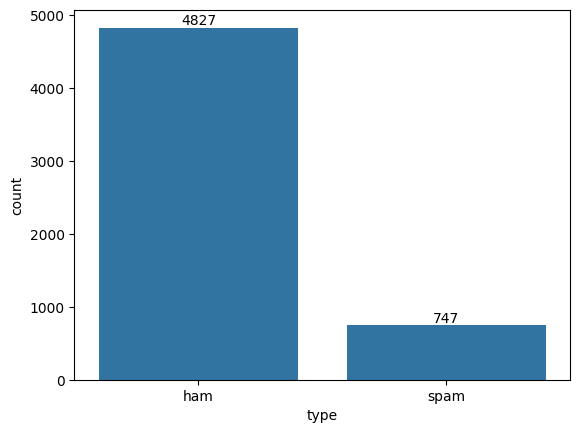

In [6]:
ax = sns.countplot(data=data,x='type')
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
# creating the length column for further analysis

data["length"] = data['text'].apply(len)

# Re-arranging the field
data = data.iloc[:,[1,2,0]]
data.head(3)

,text,length,type
0,"Go until jurong point, crazy.. Available only ...",111,ham
1,Ok lar... Joking wif u oni...,29,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,spam


In [8]:
data.describe()

,length
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [9]:
# Extracting maximum length text
data[data['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [10]:
# Extracting manimum length text
data[data['length'] == 2]['text'].iloc[0]

'Ok'

<Axes: xlabel='length'>

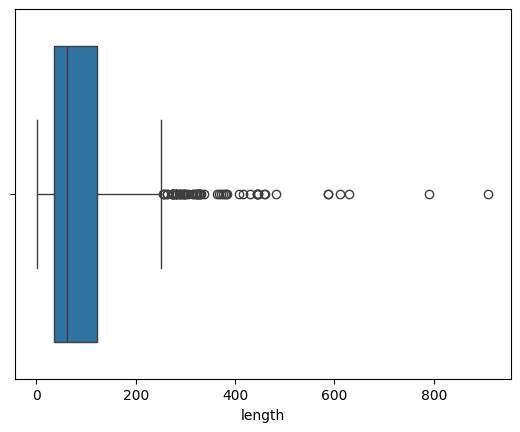

In [11]:
sns.boxplot(x=data['length'])

## Data Preprocessing

In [12]:
# Define stopwords and punctuation

stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

In [13]:
def clean_text(text):

    # Remove punctuation
    text = re.sub(f'[{punctuation}]', '', text)

    # Tokenize and remove stopwords
    tokens = text.split()
    cleaned_tokens = [lemmatizer(word) for word in tokens if word.lower() not in stop_words]

    # Rejoin tokens into a string
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text



In [14]:

# Apply the clean_text function to the 'text' column

data['cleaned_text'] = data['text'].apply(clean_text)


In [15]:
data.head()

,text,length,type,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",111,ham,Go jurong point crazy Available bugis n great ...
1,Ok lar... Joking wif u oni...,29,ham,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,49,ham,U dun say early hor U c already say
4,"Nah I don't think he goes to usf, he lives aro...",61,ham,Nah dont think go usf life around though


# Preprocessed Data

In [16]:
cleaned_data = data.iloc[:,[3,2]]
cleaned_data.head(2)

,cleaned_text,type
0,Go jurong point crazy Available bugis n great ...,ham
1,Ok lar Joking wif u oni,ham


## CountVectorizer

In [17]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

In [18]:

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(cleaned_data['cleaned_text'])
# Print feature names
print(vectorizer.get_feature_names_out())

['008704050406' '0089my' '0121' ... 'zyada' 'üll' '〨ud']


In [19]:
# Convert to DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(f"The shape of the X_df {X_df.shape}")
X_df.head(2)
y=cleaned_data['type']

The shape of the X_df (5574, 9054)


### Splitting the Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [21]:
model = MultinomialNB()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       954
        spam       0.88      0.93      0.91       161

    accuracy                           0.97      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.97      0.97      0.97      1115



## TfidfVectorizer

In [22]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(cleaned_data['cleaned_text'])

# Print feature names (optional)
print(vectorizer.get_feature_names_out())

['008704050406' '0089my' '0121' ... 'zyada' 'üll' '〨ud']


In [23]:
# Convert to DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(f"The shape of the X_df {X_df.shape}")
X_df.head(2)
y=cleaned_data['type']

The shape of the X_df (5574, 9054)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

In [25]:
model = MultinomialNB()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.968609865470852
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.78      0.88       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

